In [1]:
import pandas as pd
import numpy as np

In [2]:
frame = pd.read_csv('Dataset/ipl_csv2/all_matches.csv', index_col=None, header=0)

/Users/vishalkumarprasad/PycharmProjects/ipl-hackathon/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
frame.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,1.943540e+05,194354.000000,194354.000000,194354.000000,194354.000000,5884.000000,774.000000,511.000000,3118.000000,2.0,0.0,0.0
mean,7.587790e+05,1.483839,9.532730,1.241122,0.066420,1.210401,1.045220,1.831703,1.293137,5.0,NaN,NaN
std,3.070766e+05,0.503402,5.682251,1.611592,0.340048,0.796209,0.372776,1.292153,0.829763,0.0,NaN,NaN
min,3.359820e+05,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
25%,5.012280e+05,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
50%,7.292990e+05,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
75%,1.082630e+06,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN
max,1.254060e+06,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN


In [5]:
irrelevant = ['season', 'start_date', 'bowler', 'striker', 'non_striker', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'other_wicket_type', 'other_player_dismissed' ]
print(f'Before Removing Irrelevant Columns : {frame.shape}')
data = frame.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Before Removing Irrelevant Columns : (194354, 22)
After Removing Irrelevant Columns : (194354, 9)


,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras,player_dismissed
0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN
1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN
2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN
3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN
4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN


In [6]:

data['wicket'] = data['player_dismissed'].where(data['player_dismissed'].isna(), 1)
data['wicket'] = data['wicket'].fillna(0)

In [7]:
data['wickets'] = data.groupby(['match_id', 'innings'])['wicket'].cumsum()

In [8]:
data['tot'] = data['runs_off_bat'] + data['extras']

In [9]:
data['runs_cum'] = data.groupby(['match_id', 'innings'])['tot'].cumsum()

In [10]:
data["batting_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

In [11]:
data["bowling_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

In [12]:
data["batting_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad"}, inplace=True)

In [13]:
data["bowling_team"].replace({"Deccan Chargers": "Sunrisers Hyderabad"}, inplace=True)

In [14]:
constant_teams = ['Chennai Super Kings', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rajasthan Royals']

In [15]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(constant_teams)) & (data['bowling_team'].isin(constant_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (194354, 13)
After Removing Irrelevant Columns : (167335, 13)
Consistent Teams : 
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Capitals' 'Sunrisers Hyderabad' 'Mumbai Indians']


,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras,player_dismissed,wicket,wickets,tot,runs_cum
0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,1
1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,1
2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,2
3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2
4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2


In [16]:
print(f'Before Removing Innings : {data.shape}')
data_fil = data[data['innings'] <= 2.0]
print(f'After Removing Innings : {data_fil.shape}')
data_fil.head()

Before Removing Innings : (167335, 13)
After Removing Innings : (167199, 13)


,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras,player_dismissed,wicket,wickets,tot,runs_cum
0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,1
1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,1
2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,2
3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2
4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2


In [17]:
print(f'Before Removing Overs : {data_fil.shape}')
data_fil_ball = data_fil[data_fil['ball'] <= 6.0]
print(f'After Removing Overs : {data_fil_ball.shape}')
data_fil_ball.head()


Before Removing Overs : (167199, 13)
After Removing Overs : (52597, 13)


,match_id,venue,innings,ball,batting_team,bowling_team,runs_off_bat,extras,player_dismissed,wicket,wickets,tot,runs_cum
0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,1
1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,1
2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,NaN,0,0,1,2
3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2
4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,0,NaN,0,0,0,2


In [18]:
data_fil_ball['total']= data_fil_ball.groupby(['match_id', 'innings'])[['tot']].transform('sum')

<ipython-input-18-a05a8716685f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fil_ball['total']= data_fil_ball.groupby(['match_id', 'innings'])[['tot']].transform('sum')


In [19]:
irr = ['match_id', 'extras', 'runs_off_bat', 'tot', 'player_dismissed', 'wicket']
data_fil_ball = data_fil_ball.drop(irr, axis=1)
data_fil_ball.head()

,venue,innings,ball,batting_team,bowling_team,wickets,runs_cum,total
0,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
2,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
3,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
4,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61


In [20]:
# print(f'Before Removing Overs : {data_fil_ball.shape}')
# data_fil_ball = data_fil_ball[data_fil_ball['ball'] <= 1.0]
# print(f'After Removing Overs : {data_fil_ball.shape}')
# data_fil_ball.head()

In [21]:
venue_list = pd.unique(data_fil_ball['venue']).tolist()
df_venue = pd.DataFrame (venue_list,columns=['Venue'])
df_venue

,Venue
0,M Chinnaswamy Stadium
1,"Punjab Cricket Association Stadium, Mohali"
2,Feroz Shah Kotla
3,Eden Gardens
4,Wankhede Stadium
5,Sawai Mansingh Stadium
6,"Rajiv Gandhi International Stadium, Uppal"
7,"MA Chidambaram Stadium, Chepauk"
8,Dr DY Patil Sports Academy
9,Newlands


In [22]:
dict_stadium = {
'M Chinnaswamy Stadium': 'Bengaluru',
'Feroz Shah Kotla': 'Delhi',
'Eden Gardens': 'Kolkata',
'Wankhede Stadium': 'Mumbai',
'MA Chidambaram Stadium, Chepauk': 'Chennai',
'Sardar Patel Stadium, Motera': 'Ahmedabad',
'M.Chinnaswamy Stadium': 'Bengaluru',
'MA Chidambaram Stadium': 'Chennai',
'Arun Jaitley Stadium': 'Delhi',
'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
'Wankhede Stadium, Mumbai': 'Mumbai'}
data_fil_ball["venue"].replace(dict_stadium, inplace=True)


In [23]:
consistent_venue = ['Bengaluru','Delhi','Kolkata', 'Mumbai', 'Chennai','Ahmedabad']

In [24]:
print(f'Before Removing Inconsistent Teams : {data_fil_ball.shape}')
df_stand = data_fil_ball[(data_fil_ball['venue'].isin(consistent_venue))]
print(f'After Removing Irrelevant Columns : {df_stand.shape}')
print(f"Consistent Teams : \n{df_stand['venue'].unique()}")
df_stand.head()

Before Removing Inconsistent Teams : (52597, 8)
After Removing Irrelevant Columns : (25321, 8)
Consistent Teams : 
['Bengaluru' 'Delhi' 'Kolkata' 'Mumbai' 'Chennai' 'Ahmedabad']


,venue,innings,ball,batting_team,bowling_team,wickets,runs_cum,total
0,Bengaluru,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
1,Bengaluru,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
2,Bengaluru,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
3,Bengaluru,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
4,Bengaluru,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61


In [25]:
df_stand.drop_duplicates(inplace=True)
df_stand.reset_index(drop=True, inplace=True)
df_stand.head()



<ipython-input-25-08d95652a327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand.drop_duplicates(inplace=True)


,venue,innings,ball,batting_team,bowling_team,wickets,runs_cum,total
0,Bengaluru,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
1,Bengaluru,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,61
2,Bengaluru,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
3,Bengaluru,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61
4,Bengaluru,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,61


In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
dict_label = {'Kolkata Knight Riders':'Bat KKR', 'Royal Challengers Bangalore': 'Bat RCB', 
              'Chennai Super Kings':'Bat CSK', 'Delhi Capitals': 'Bat DC',
              'Mumbai Indians': 'Bat MI', 'Kings XI Punjab': 'Bat PBKS', 
              'Sunrisers Hyderabad': 'Bat SRH', 'Rajasthan Royals': 'Bat RR'}
df_stand['batting_team'] = df_stand['batting_team'].map(dict_label)
df_stand.head()


<ipython-input-26-68cbc1465ed4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stand['batting_team'] = df_stand['batting_team'].map(dict_label)


,venue,innings,ball,batting_team,bowling_team,wickets,runs_cum,total
0,Bengaluru,1,0.1,Bat KKR,Royal Challengers Bangalore,0,1,61
1,Bengaluru,1,0.2,Bat KKR,Royal Challengers Bangalore,0,1,61
2,Bengaluru,1,0.3,Bat KKR,Royal Challengers Bangalore,0,2,61
3,Bengaluru,1,0.4,Bat KKR,Royal Challengers Bangalore,0,2,61
4,Bengaluru,1,0.5,Bat KKR,Royal Challengers Bangalore,0,2,61


In [27]:
dataset = pd.get_dummies(df_stand, columns=['batting_team'], prefix='', prefix_sep='')
dataset.head()

,venue,innings,ball,bowling_team,wickets,runs_cum,total,Bat CSK,Bat DC,Bat KKR,Bat MI,Bat PBKS,Bat RCB,Bat RR,Bat SRH
0,Bengaluru,1,0.1,Royal Challengers Bangalore,0,1,61,0,0,1,0,0,0,0,0
1,Bengaluru,1,0.2,Royal Challengers Bangalore,0,1,61,0,0,1,0,0,0,0,0
2,Bengaluru,1,0.3,Royal Challengers Bangalore,0,2,61,0,0,1,0,0,0,0,0
3,Bengaluru,1,0.4,Royal Challengers Bangalore,0,2,61,0,0,1,0,0,0,0,0
4,Bengaluru,1,0.5,Royal Challengers Bangalore,0,2,61,0,0,1,0,0,0,0,0


In [28]:

dict_label_bowl = {'Kolkata Knight Riders':'Bowl KKR', 'Royal Challengers Bangalore': 'Bowl RCB', 
              'Chennai Super Kings':'Bowl CSK', 'Delhi Capitals': 'Bowl DC',
              'Mumbai Indians': 'Bowl MI', 'Kings XI Punjab': 'Bowl PBKS', 
              'Sunrisers Hyderabad': 'Bowl SRH', 'Rajasthan Royals': 'Bowl RR'}
dataset['bowling_team'] = dataset['bowling_team'].map(dict_label_bowl)
dataset.head()

,venue,innings,ball,bowling_team,wickets,runs_cum,total,Bat CSK,Bat DC,Bat KKR,Bat MI,Bat PBKS,Bat RCB,Bat RR,Bat SRH
0,Bengaluru,1,0.1,Bowl RCB,0,1,61,0,0,1,0,0,0,0,0
1,Bengaluru,1,0.2,Bowl RCB,0,1,61,0,0,1,0,0,0,0,0
2,Bengaluru,1,0.3,Bowl RCB,0,2,61,0,0,1,0,0,0,0,0
3,Bengaluru,1,0.4,Bowl RCB,0,2,61,0,0,1,0,0,0,0,0
4,Bengaluru,1,0.5,Bowl RCB,0,2,61,0,0,1,0,0,0,0,0


In [29]:
dataset = pd.get_dummies(dataset, columns=['bowling_team'], prefix='', prefix_sep='')
dataset.head()

,venue,innings,ball,wickets,runs_cum,total,Bat CSK,Bat DC,Bat KKR,Bat MI,...,Bat RR,Bat SRH,Bowl CSK,Bowl DC,Bowl KKR,Bowl MI,Bowl PBKS,Bowl RCB,Bowl RR,Bowl SRH
0,Bengaluru,1,0.1,0,1,61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Bengaluru,1,0.2,0,1,61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Bengaluru,1,0.3,0,2,61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Bengaluru,1,0.4,0,2,61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Bengaluru,1,0.5,0,2,61,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
dataset = pd.get_dummies(dataset, columns=['venue'], prefix='', prefix_sep='')
dataset.head()

,innings,ball,wickets,runs_cum,total,Bat CSK,Bat DC,Bat KKR,Bat MI,Bat PBKS,...,Bowl PBKS,Bowl RCB,Bowl RR,Bowl SRH,Ahmedabad,Bengaluru,Chennai,Delhi,Kolkata,Mumbai
0,1,0.1,0,1,61,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0.2,0,1,61,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0.3,0,2,61,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0.4,0,2,61,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0.5,0,2,61,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [31]:
df = dataset[['Bat CSK', 'Bat DC', 'Bat KKR', 'Bat MI',
       'Bat PBKS', 'Bat RCB', 'Bat RR', 'Bat SRH', 'Bowl CSK', 'Bowl DC',
       'Bowl KKR', 'Bowl MI', 'Bowl PBKS', 'Bowl RCB', 'Bowl RR', 'Bowl SRH', 
              'Delhi', 'Mumbai', 'Kolkata','Chennai', 'Bengaluru', 'Ahmedabad', 'innings', 'ball', 'runs_cum', 'wickets', 'total' ]]

In [32]:
# Visualize Encoded Data
df.head()

,Bat CSK,Bat DC,Bat KKR,Bat MI,Bat PBKS,Bat RCB,Bat RR,Bat SRH,Bowl CSK,Bowl DC,...,Mumbai,Kolkata,Chennai,Bengaluru,Ahmedabad,innings,ball,runs_cum,wickets,total
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.1,1,0,61
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.2,1,0,61
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.3,2,0,61
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.4,2,0,61
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.5,2,0,61


In [33]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [34]:

# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (20194, 26)
Testing Set : (5049, 26)


In [35]:
# train_data = df[df['ball'] > 0.3]
# train_features = train_data.drop(['total'], axis=1)
# train_labels = train_data['total']

In [36]:
# test_data = df[df['ball'] <= 0.3]
# test_features = test_data.drop(['total'], axis=1)
# test_labels = test_data['total']

In [37]:
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (20194, 26)
Testing Set : (5049, 26)


In [38]:
# Keeping track of model perfomances
models = dict()

In [39]:
#Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [41]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 96.03%
Test Score : 44.34%


In [42]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 4.893081138179178
Mean Squared Error (MSE): 80.02702955480734
Root Mean Squared Error (RMSE): 8.94578278043947


In [43]:
#Linear

In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [45]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 51.81%
Test Score : 51.86%


In [46]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 6.069548721394336
Mean Squared Error (MSE): 69.20409990848125
Root Mean Squared Error (RMSE): 8.318900162189786


In [47]:
#Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [49]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 92.69%
Test Score : 66.48%


In [50]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.604358512061869
Mean Squared Error (MSE): 48.18320106957541
Root Mean Squared Error (RMSE): 6.941412037156087


In [51]:
#Neural

In [52]:
from sklearn.neural_network import MLPRegressor
neural_net = MLPRegressor(activation='logistic', max_iter=500)
# Train Model
neural_net.fit(train_features, train_labels)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', max_iter=500)

In [53]:
train_score_neural_net = str(neural_net.score(train_features, train_labels)*100)
test_score_neural_net = str(neural_net.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_neural_net[:5]}%\nTest Score : {test_score_neural_net[:5]}%')
models["neural_net"] = test_score_neural_net

Train Score : 71.19%
Test Score : 69.20%


In [54]:
print("---- Neural Networks Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, neural_net.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, neural_net.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, neural_net.predict(test_features)))))

---- Neural Networks Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.79437418455747
Mean Squared Error (MSE): 44.27295885187338
Root Mean Squared Error (RMSE): 6.653792817023489


In [55]:
#Best Model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

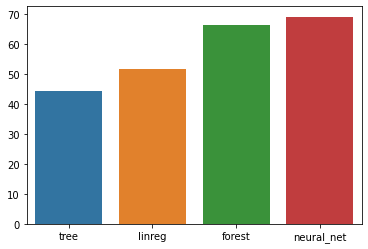

In [56]:
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(model_names, accuracy)

In [57]:

def predict_score(batting_team, bowling_team, venue, innings, ball, runs,  wickets, model=neural_net):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Capitals':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Punjab Kings':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  #Venue
  if venue == 'Delhi':
    prediction_array = prediction_array + [1,0,0,0,0,0]
  elif venue == 'Mumbai':
    prediction_array = prediction_array + [0,1,0,0,0,0]
  elif venue == 'Kolkata':
    prediction_array = prediction_array + [0,0,1,0,0,0]
  elif venue == 'Chennai':
    prediction_array = prediction_array + [0,0,0,1,0,0]
  elif venue == 'Ahmedabad':
    prediction_array = prediction_array + [0,0,0,0,0,1]
  elif venue == 'Bengaluru':
    prediction_array = prediction_array + [0,0,0,0,1,0]
        
  prediction_array = prediction_array + [innings, ball, runs, wickets]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

In [58]:
batting_team='Rajasthan Royals'
bowling_team='Royal Challengers Bangalore'
venue='Mumbai'
score = predict_score(batting_team, bowling_team,venue, 1, 0, 0, 0)
print(f'Predicted Score : {score} || Actual: 32')

Predicted Score : 49 || Actual: 32


In [59]:
batting_team='Chennai Super Kings'
bowling_team='Delhi Capitals'
venue='Mumbai'
score = predict_score(batting_team, bowling_team,venue, 2, 0, 0, 0)
print(f'Predicted Score : {score} || Actual: 33')

Predicted Score : 50 || Actual: 33


In [61]:
batting_team='Kolkata Knight Riders'
bowling_team='Rajasthan Royals'
venue='Chennai'
score = predict_score(batting_team, bowling_team,venue, 2, 0, 0, 0)
print(f'Predicted Score : {score} || Actual: 45')

Predicted Score : 40 || Actual: 45


In [72]:
from joblib import dump

dump(neural_net, "neural_nets_model.pkl")

['neural_nets_model.pkl']